# Response Matrix I/O Testing

Test formatting response matrix as an xarray object and writing/reading to a netCDF file

In [65]:
import matplotlib.pyplot as plt
import xarray
import distributed
import numpy as np
from astropy.visualization import ImageNormalize, LogStretch

from mocksipipeline.detector.response import get_all_dispersed_channels
from mocksipipeline.physics.spectral import SpectralModel
from mocksipipeline.inversion.response_matrix import compute_response_matrix

In [2]:
spec_table = SpectralModel().spectral_table

In [3]:
client = distributed.Client()

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52272,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:52286,Total threads: 2
Dashboard: http://127.0.0.1:52290/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:52275,


In [5]:
resp_matrix = compute_response_matrix(spec_table)

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]


(1e-35, 1e-28)

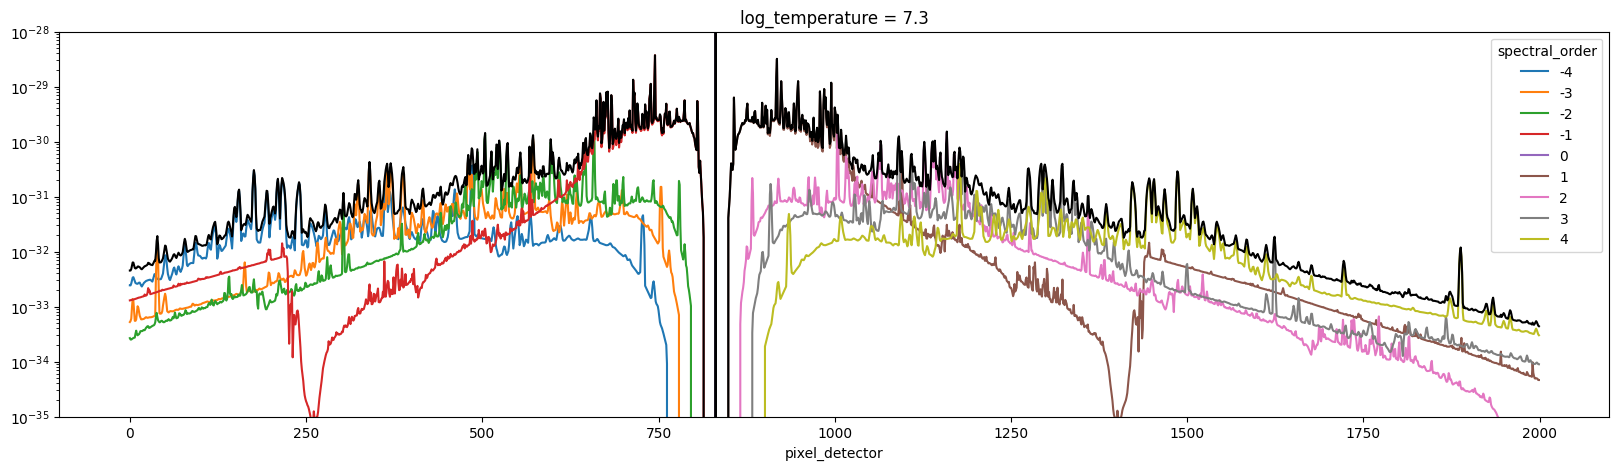

2023-07-31 15:07:35,809 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2023-07-31 15:07:48,264 - distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
2023-07-31 15:07:56,107 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
2023-07-31 15:08:12,914 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
2023-07-31 15:08:18,547 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
2023-07-31 15:08:20,992 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
2023-07-31 15:08:26,478 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
2023-07-31 15:08:29,948 - distributed.utils_perf - WARNING - full garbage collections took

In [60]:
plt.figure(figsize=(20,5))
resp_matrix.sel(log_temperature=7.3, method='nearest').isel(pixel_fov=0).plot.line(hue='spectral_order')
resp_matrix.sel(log_temperature=7.3, method='nearest').isel(pixel_fov=0).sum('spectral_order').plot(color='k')
plt.yscale('log')
plt.ylim(1e-35, 1e-28)

Now, put this into an xarray data array

In [56]:
resp_matrix.to_netcdf(path='moxsi_response_matrix.nc')

More visualizing

In [61]:
resp_matrix_from_disk = xarray.open_dataarray('moxsi_response_matrix.nc')

In [69]:
%matplotlib widget

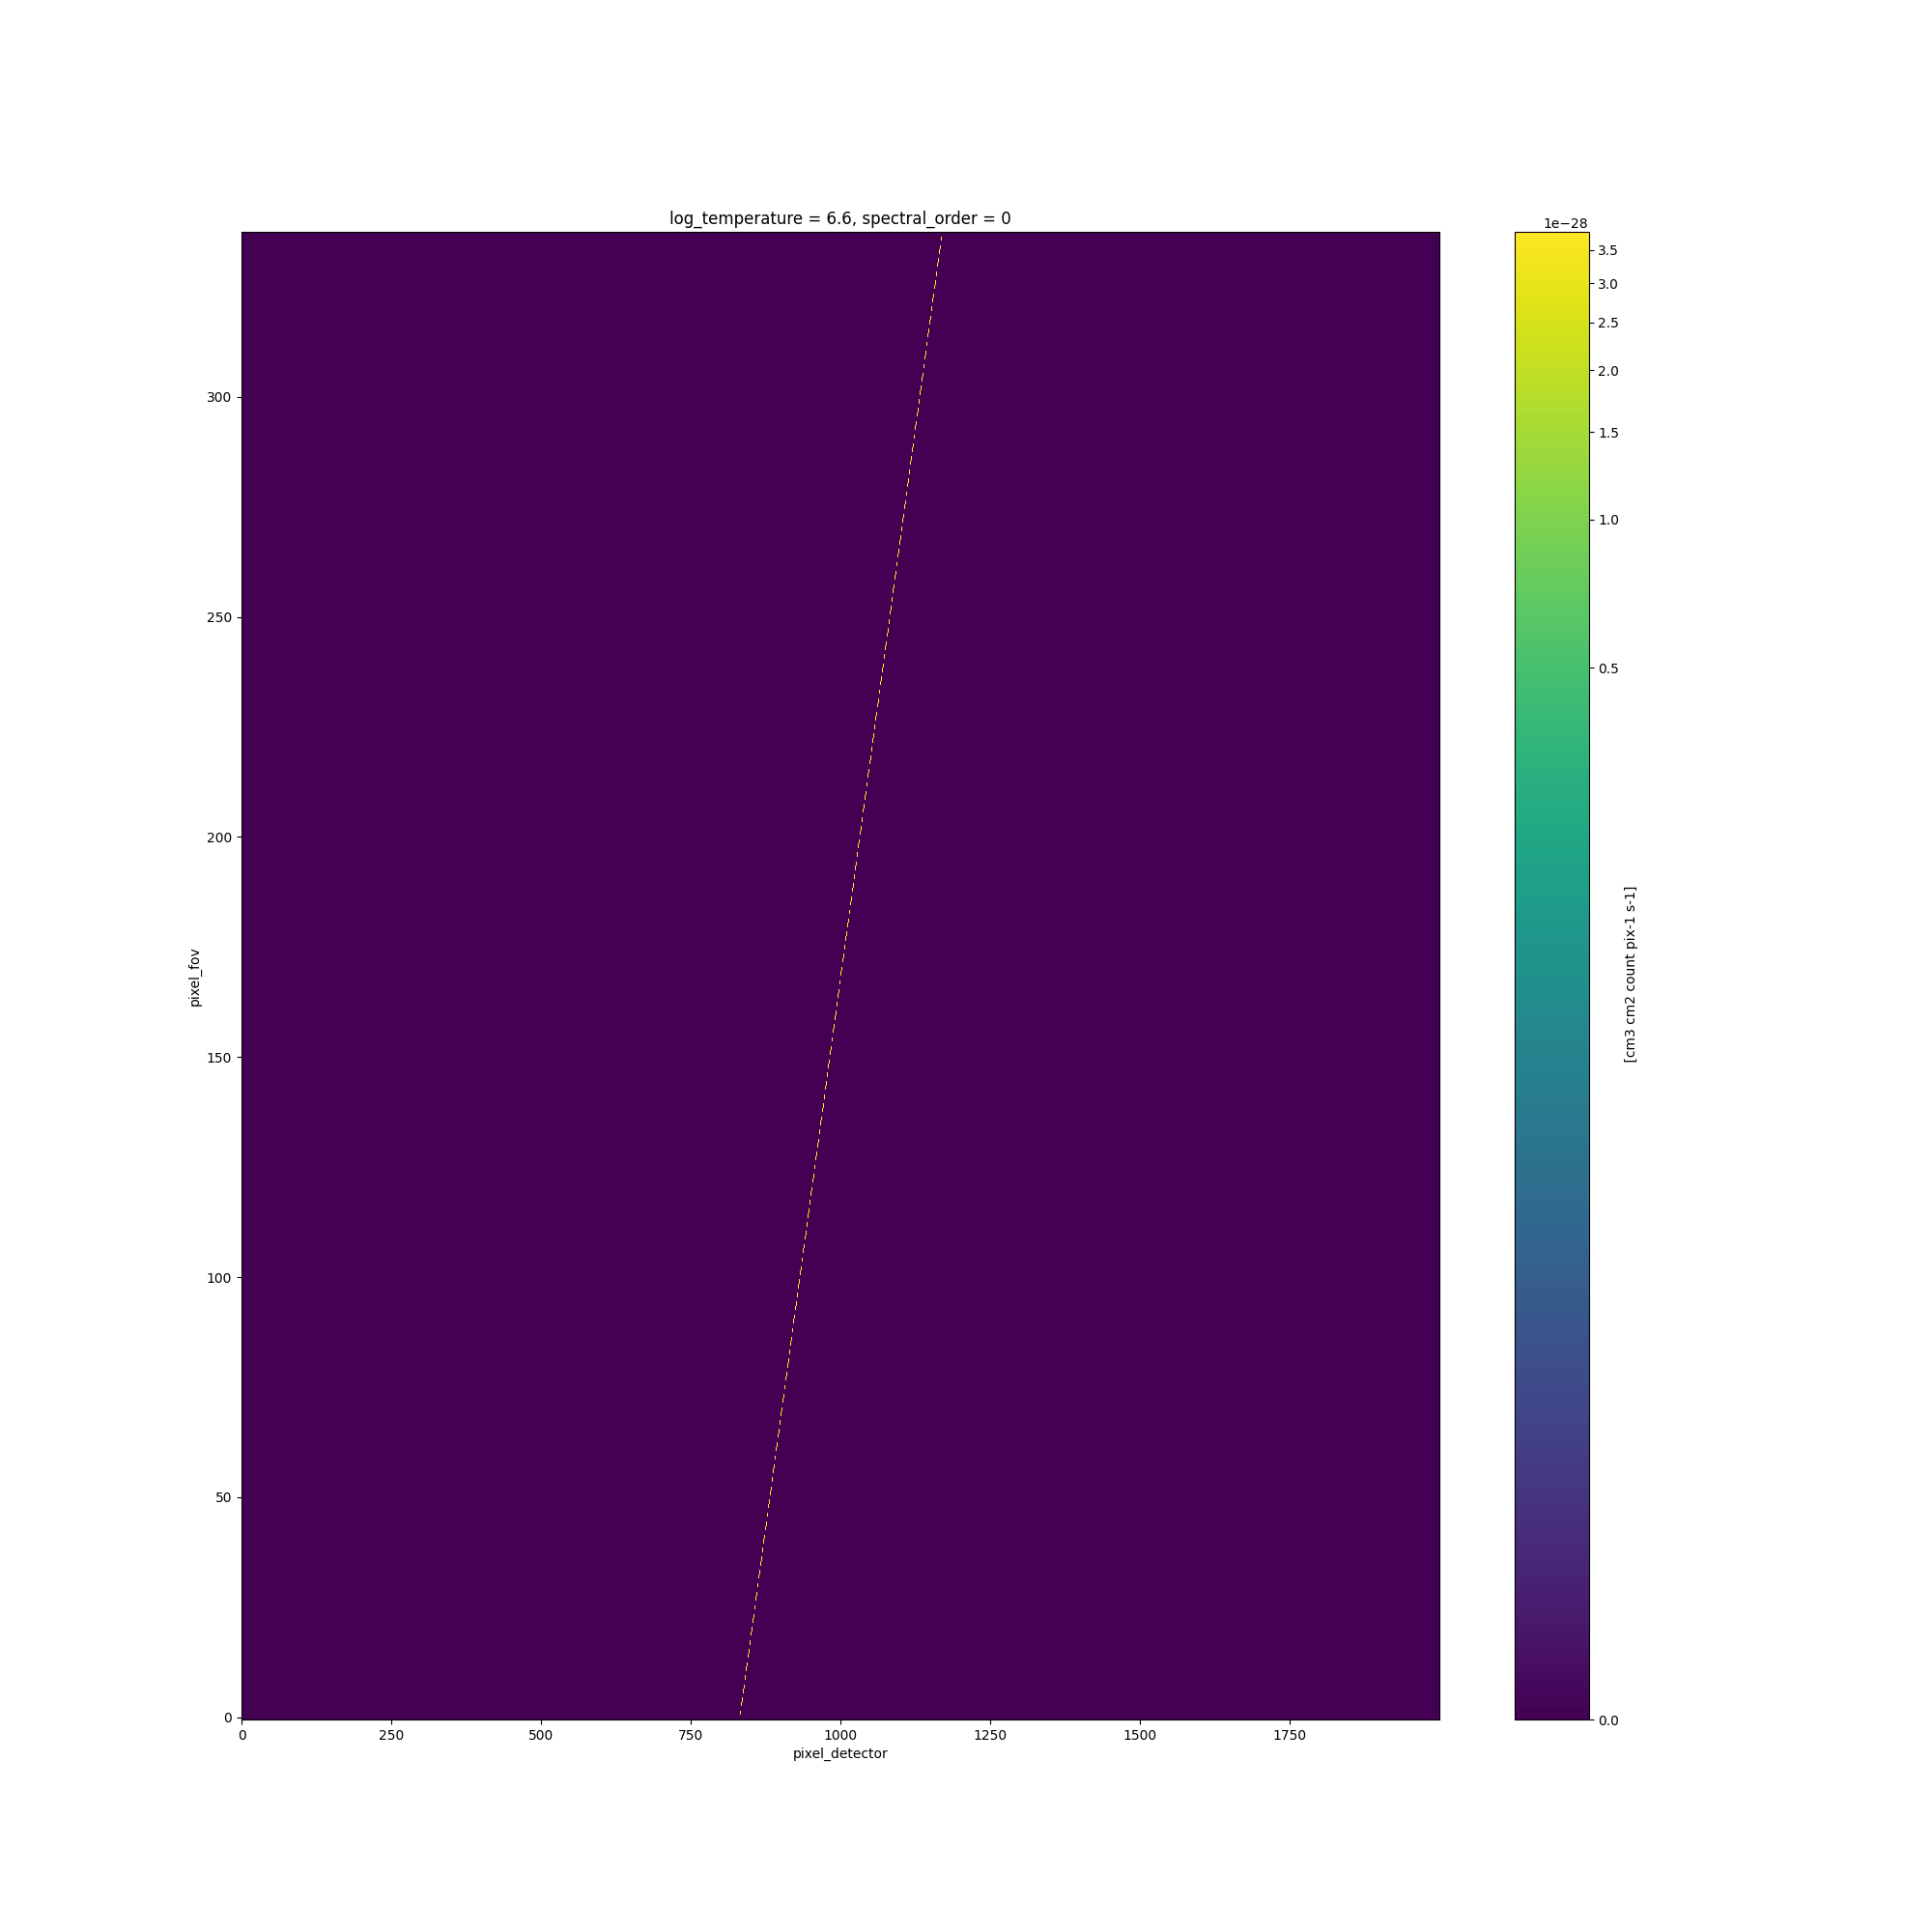

In [74]:
plt.figure(figsize=(20,20))
resp_matrix_from_disk.sel(spectral_order=0, log_temperature=6.6, method='nearest').plot.imshow(interpolation='none', norm=ImageNormalize(stretch=LogStretch()))

(1e-33, 1e-29)

2023-07-31 17:19:03,356 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


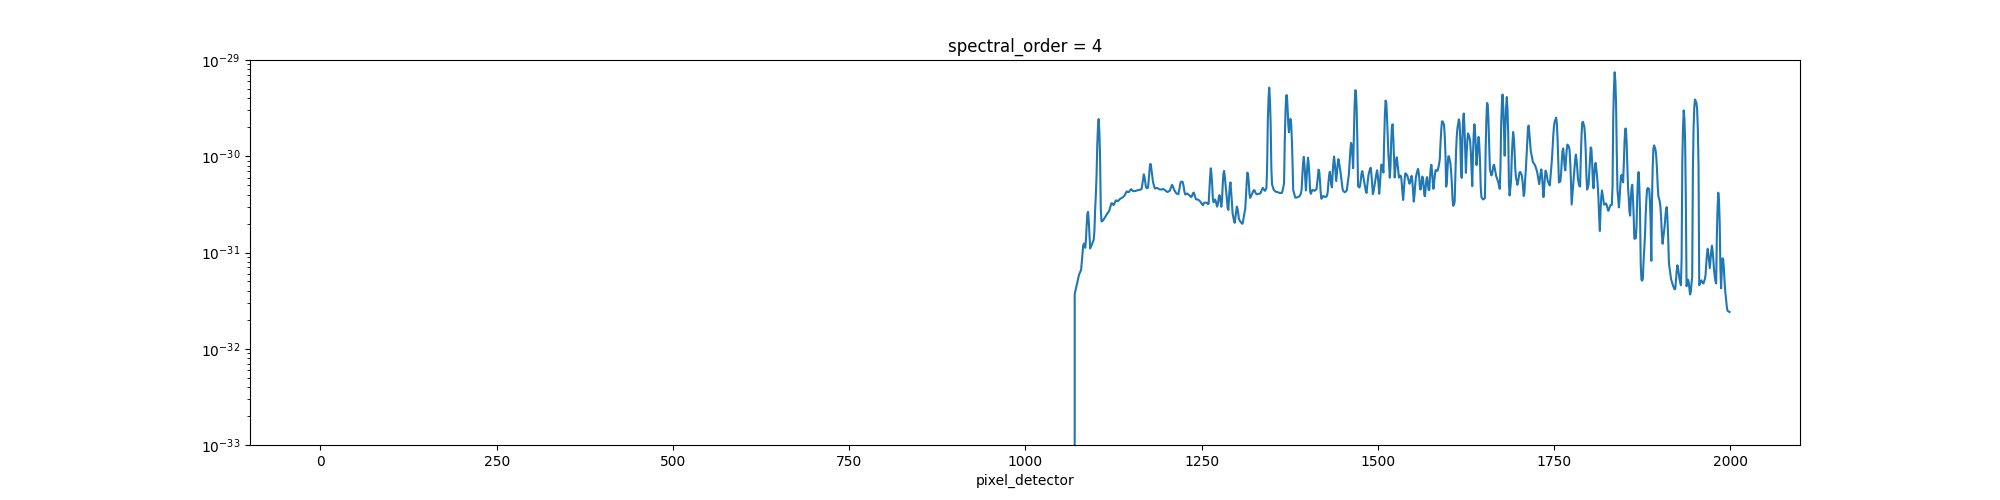

In [96]:
plt.figure(figsize=(20,5))
#resp_matrix.sel(log_temperature=7.3, method='nearest').isel(pixel_fov=169).plot.line(hue='spectral_order')
resp_matrix.sel(method='nearest',spectral_order=4).isel(pixel_fov=169).sum(dim='log_temperature').plot.line()
#resp_matrix.sel(log_temperature=7.3, method='nearest').isel(pixel_fov=0).sum('spectral_order').plot(color='k')
plt.yscale('log')
plt.ylim(1e-33, 1e-29)

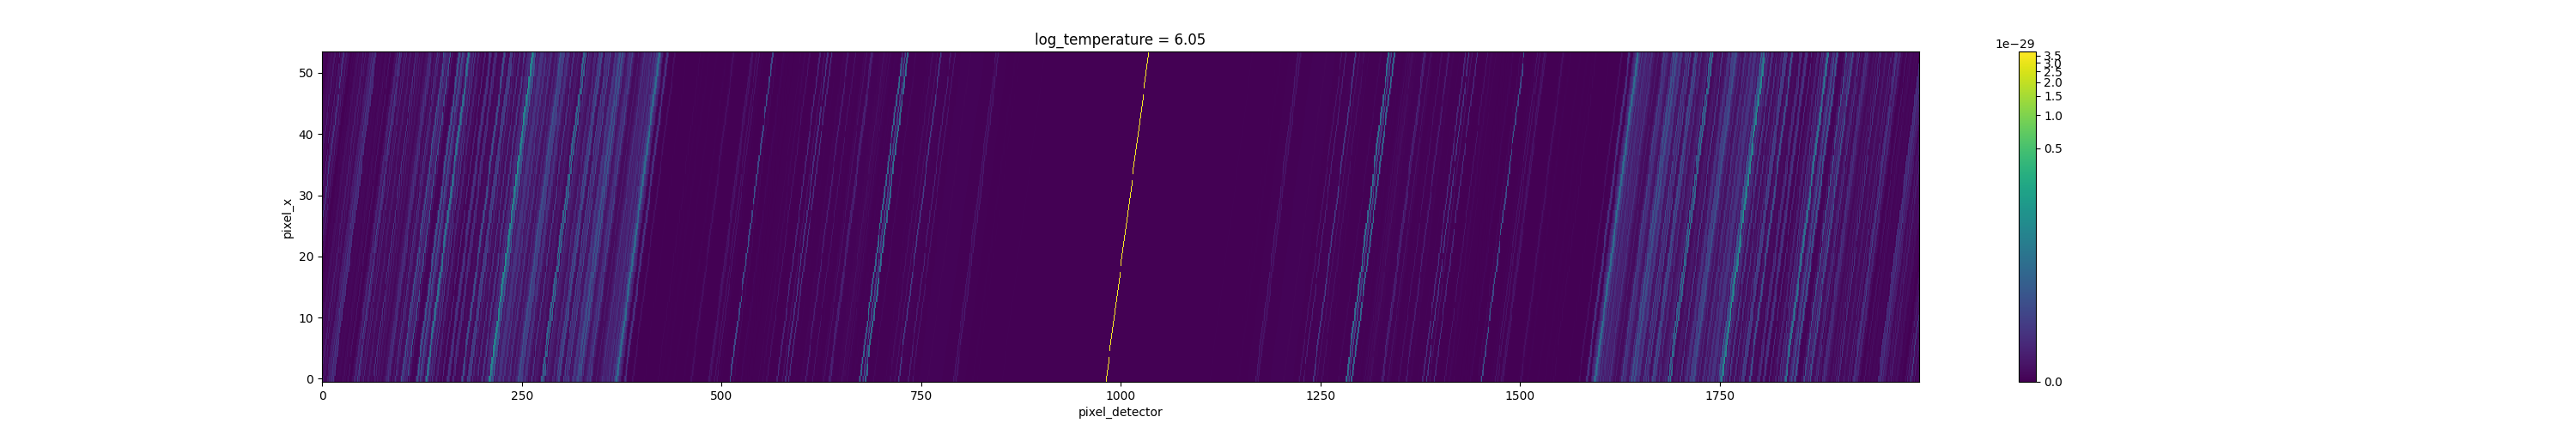

In [ ]:
fig = plt.figure(figsize=(30,5))
response_matrix_total[:,:,:].sel(log_temperature=6, method='nearest').plot.imshow(interpolation='none', norm=ImageNormalize(stretch=LogStretch()))
ax.set_aspect('equal')

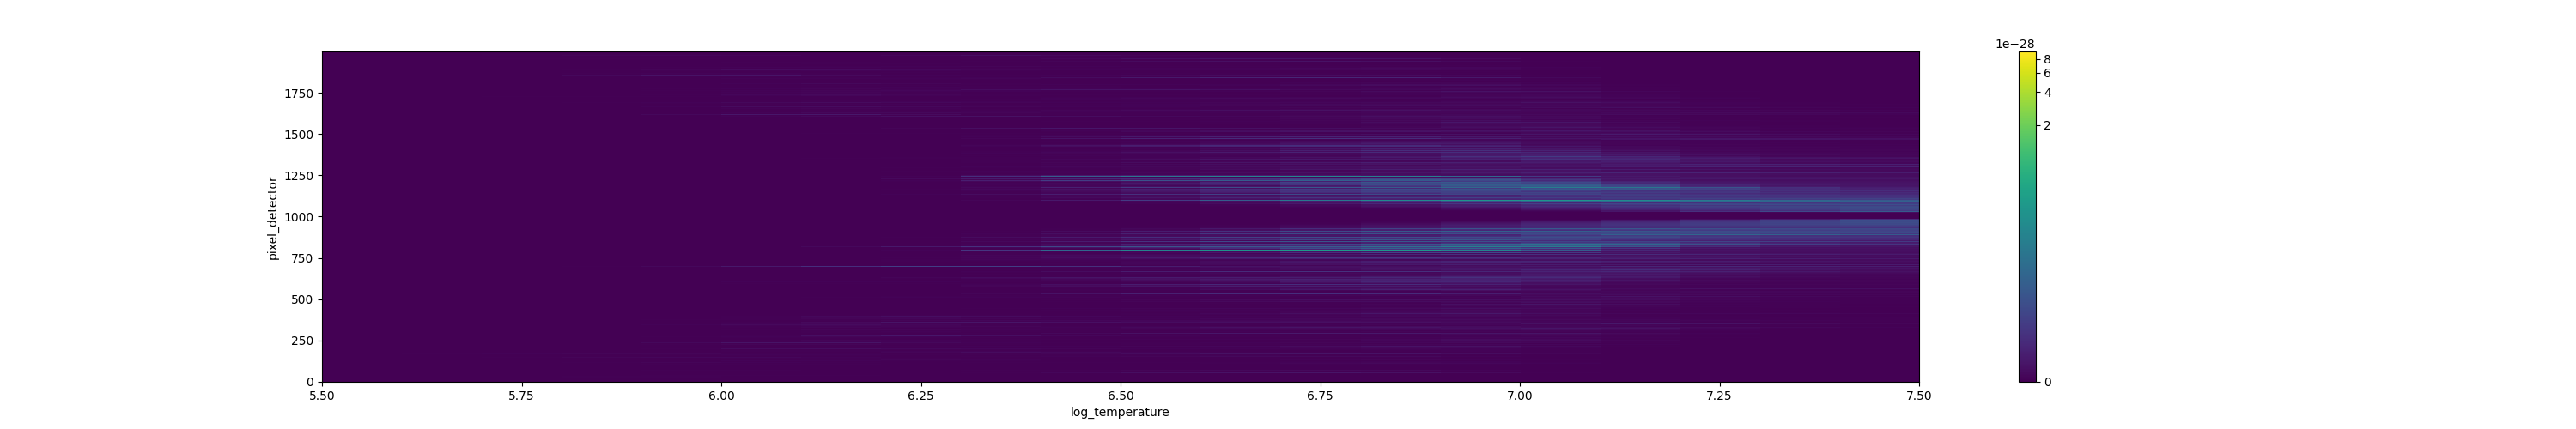

In [ ]:
fig = plt.figure(figsize=(30,5))
response_matrix_total[:,:,:].isel(pixel_x=25).plot.imshow(interpolation='none', norm=ImageNormalize(stretch=LogStretch()))
ax.set_aspect('equal')